In [1]:
# 시각화 -> EDA -> 특성공학(변수 추가...)-> 모델링 ->평가

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#sns.set() #디폴트 색상, 스타일 등 설정

In [4]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

# titanic 데이터 => 891(훈련) + 418(테스트)
"""
훈련데이터와 테스트데이터를 나누는 방법
1. 2/3(훈련) + 1/3(테스트)
2. 70%(훈련) + 30%(테스트)
"""

'\n훈련데이터와 테스트데이터를 나누는 방법\n1. 2/3(훈련) + 1/3(테스트)\n2. 70%(훈련) + 30%(테스트)\n'

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info() #칼럼명과 칼럼별 누락값 수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe() #숫자 타입 칼럼에 대한 기술통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include=['O']) #Object타입 칼럼에 대한 기술통계

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Master. Eugene",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train.isnull().sum() #널 값의 갯수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,2,1
3,895,3,0,1,1,0,3,1
4,896,3,1,1,1,0,1,0


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int32
 4   Fare         418 non-null    int32
 5   Embarked     418 non-null    int64
 6   Title        418 non-null    int64
 7   IsAlone      418 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 23.0 KB


In [82]:
test.describe()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.358852,1.490431,0.464115,1.753589,0.605263
std,120.810458,0.841838,0.481622,0.786841,1.146846,0.685516,0.998343,0.489380
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1100.500000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1309.000000,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,1.000000


In [83]:
test.describe(include=['O'])

ValueError: No objects to concatenate

In [ ]:
test.isnull().sum()

# 1. EDA

features과 생존 여부 사이에 어떤 관계가 있는지?

In [11]:
survived = train[train['Survived']==1] #생존자만 추출한 표
not_survived = train[train['Survived']==0] #사망자만 추출한 표

In [12]:
print("Survived: %d (%.1f%%)" % (len(survived), len(survived)/(len(survived)+len(not_survived))*100))
print("Not Survived: %d (%.1f%%)" % (len(not_survived), len(not_survived)/(len(survived)+len(not_survived))*100))
print("Total: ", len(survived)+len(not_survived))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total:  891


## 1-1. __Pclass__ 

:등실에 따른 생존여부?

In [13]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
#등실별 생존 여부에 따른 인원수 출력
train.groupby(["Pclass", "Survived"]).size() #as_index=False옵션을 주면 인덱스가 아닌 칼럼으로 확인가능
                                             #unstack옵션 공부!!!

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass'>

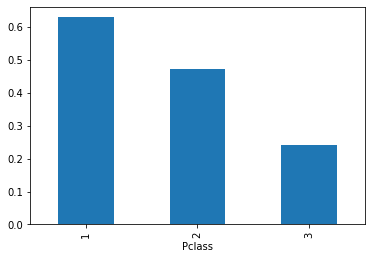

In [16]:
#시각화1
train.groupby("Pclass").Survived.mean().plot(kind ='bar') #defalut : 선그래프

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

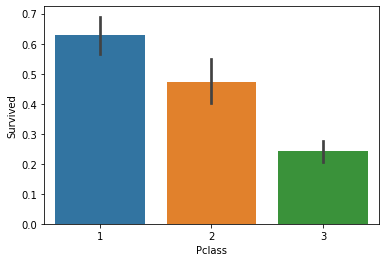

In [17]:
#시각화2
sns.barplot(x="Pclass", y="Survived", data=train)

##  1-2. __Sex__ 
: 성별과 생존여부?

In [18]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
#각 성별 생존 여부
train.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [20]:
train[['Sex', 'Survived']].groupby("Sex", as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

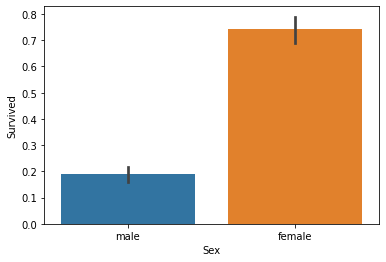

In [21]:
sns.barplot(x="Sex", y="Survived", data=train)

##  1-3. __Pclass & Sex__ 

: 두 칼럼을 동시에 생존여부와의 관계 파악하기

In [22]:
#크로스테이블(교차행렬)
pd.crosstab(train.Pclass, train.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


C:\Users\CJ\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


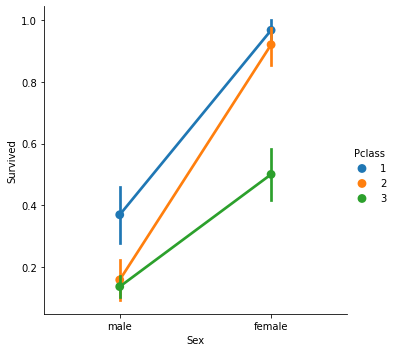

In [23]:
sns.factorplot("Sex", "Survived", hue='Pclass', data=train) #hue : 범례
#추가 가능 옵션 : size=4, aspect=2

C:\Users\CJ\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


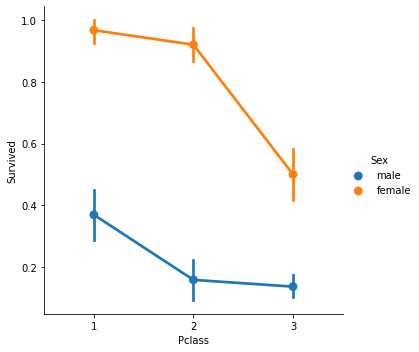

In [24]:
sns.factorplot("Pclass", "Survived", hue='Sex', data=train)

C:\Users\CJ\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


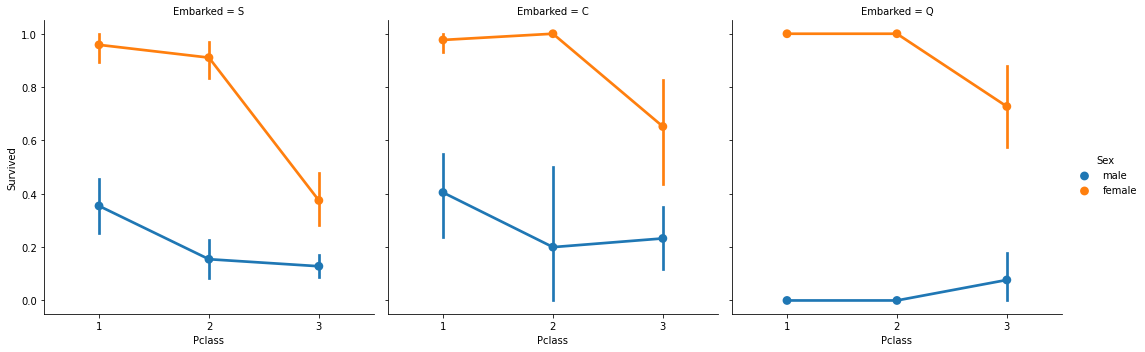

In [25]:
#승선항에 따른 결과값 시각화
sns.factorplot("Pclass", "Survived", hue='Sex', col='Embarked', data=train)

## 1-4. __Embarked__ 

: 승선 항구(Embarked)에 따른 생존여부?

In [26]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train.groupby("Embarked").Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

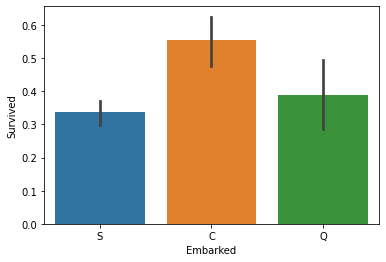

In [28]:
sns.barplot(x="Embarked", y="Survived", data=train)

## 1-5. __Parch__

: 직계가족 수와 생존여부?

In [29]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
train.groupby("Parch").Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [31]:
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()
#4, 6의 경우 생존률이 0에 수렴하기 때문에 의미가 크지 않은 데이터

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

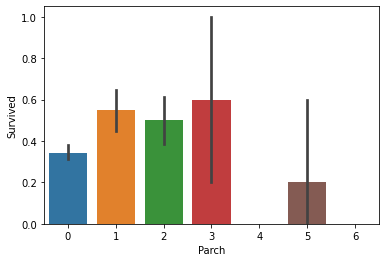

In [32]:
sns.barplot(x='Parch', y='Survived', data=train)
# 검정색 라인 => error bar(오차막대): 신뢰구간

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

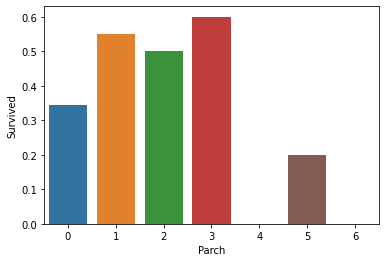

In [33]:
sns.barplot(x='Parch', y='Survived', data=train, ci=None) #ci옵션 : 신뢰구간 표시 삭제

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

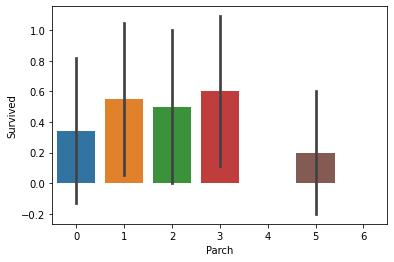

In [34]:
sns.barplot(x='Parch', y='Survived', data=train, ci="sd")

## 1-6. __Sibsp__

:반계가족(형제,사촌) 수와 생존여부?

In [35]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
train.groupby("SibSp").Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [37]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

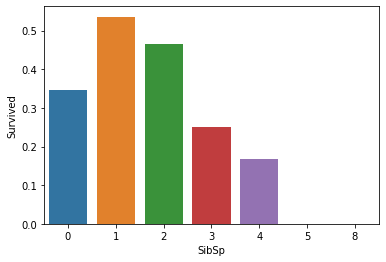

In [38]:
sns.barplot(x='SibSp', y='Survived', data=train, ci=None)

## 1-7. __Age(x) & Embarked/Pcalss/Sex(x)__ 
: 연령별 생존여부(범례)? ==> 바이올린plot

'\n흰색점 : 중앙값(median)\n중앙의 두꺼운 선 : 사분위 범위\n중앙의 얇은 선 : 신뢰구간 (95% 신뢰구간)\n'

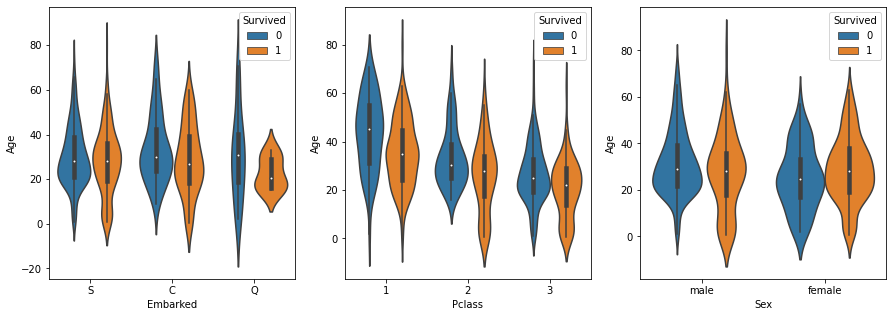

In [39]:
# 바이올린 plot?
# 외형은 matplot
# 내부에 들어가는 그래프는 seaborn

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131) # 1줄 3칸으로 나눈 다음 1번째 위치(칸)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#A ge(x), Embarked/Pcalss/Sex(x), 생존여부(범례)
sns.violinplot(x='Embarked', y="Age", hue='Survived', data=train, ax=ax1)
sns.violinplot(x='Pclass', y="Age", hue='Survived', data=train, ax=ax2)
sns.violinplot(x='Sex', y="Age", hue='Survived', data=train, ax=ax3)

"""
흰색점 : 중앙값(median)
중앙의 두꺼운 선 : 사분위 범위
중앙의 얇은 선 : 신뢰구간 (95% 신뢰구간)
"""

In [40]:
total_survived = train[train.Survived==1]
total_not_survived = train[train.Survived==0]

male_survived = train[(train.Survived==1) & (train.Sex=='male')]
female_survived = train[(train.Survived==1) & (train.Sex=='female')]
male_not_survived = train[(train.Survived==0) & (train.Sex=='male')]
female_not_survived = train[(train.Survived==0) & (train.Sex=='female')]

<AxesSubplot:xlabel='Age'>

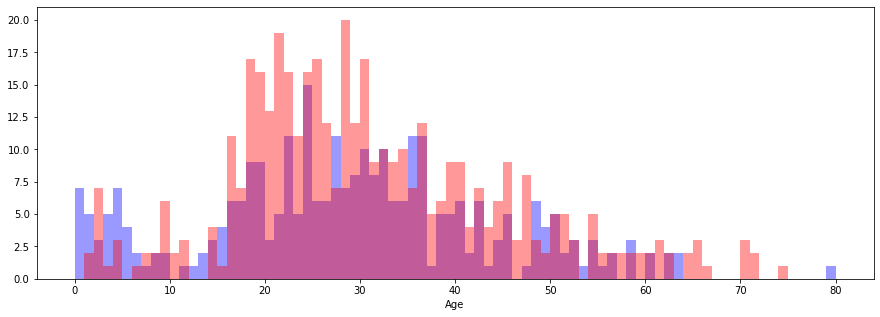

In [41]:
#distplot : 히스토그램, 수치형 데이터의 빈도수를 시각화(나이에 따른 빈도수)
plt.figure(figsize=[15,5])

plt.subplot(111)
sns.distplot(total_survived.Age.dropna().values, kde=False, bins=range(0,81,1), color='blue', axlabel='Age') #kde: 밀집도그래프
sns.distplot(total_not_survived.Age.dropna().values, kde=False, bins=range(0,81,1), color='red', axlabel='Age')

<AxesSubplot:xlabel='male Age'>

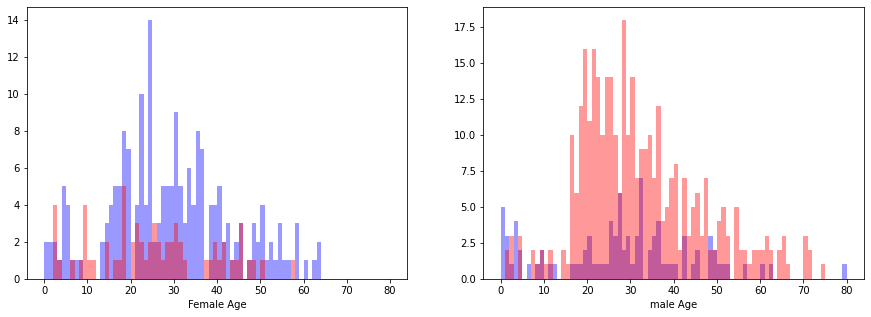

In [42]:
plt.figure(figsize=[15,5])

plt.subplot(121) #1줄 2칸, 1번째 칸에 출력
sns.distplot(female_survived.Age.dropna().values, kde=False, bins=range(0,81,1), color='blue', axlabel='Female Age') #kde: 밀집도그래프
sns.distplot(female_not_survived.Age.dropna().values, kde=False, bins=range(0,81,1), color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived.Age.dropna().values, kde=False, bins=range(0,81,1), color='blue', axlabel='male Age') #kde: 밀집도그래프
sns.distplot(male_not_survived.Age.dropna().values, kde=False, bins=range(0,81,1), color='red', axlabel='male Age')

<AxesSubplot:>

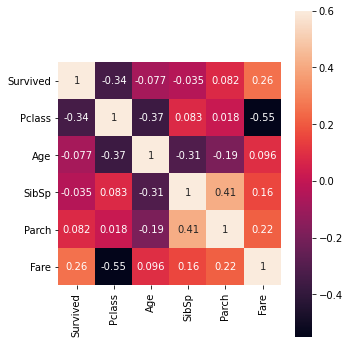

In [43]:
#양/음의 상관관계
plt.figure(figsize=(5,6))
sns.heatmap(train.drop("PassengerId",axis=1).corr(), square=True, annot=True, vmax=0.6)

In [44]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 2. Feature Engineering

: category -> numerical 변형

## 2-1. `Title`컬럼 생성
* 호칭만 추출하여 Title 컬럼 생성

In [45]:
train_test_data = [train, test] #리스트내에 데이터프레임 2개가 요소로 저장

In [46]:
for dataset in train_test_data:
    dataset['Title']=train.Name.str.extract(" ([A-Za-z]+)\.")
    #호칭의 특징 : 공백문자+알파벳+점(.)

In [47]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [48]:
#여성을 칭하는 호칭을 통일
#여성(Miss, Mrs)과 남성(Mr)을 제외한 나머지는 Other로 통일
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].replace("Mlle", "Miss")
    dataset['Title']=dataset['Title'].replace("Ms", "Miss")
    dataset['Title']=dataset['Title'].replace("Mme", "Miss")
    dataset['Title']=dataset['Title'].replace("Lady", "Miss")
    
    dataset['Title']=dataset['Title'].replace(['Countess', 'Don', "Jonkheer", "Major", "Rev", "Sir", "Capt", "Col", "Dr"], "Other")   

In [49]:
# 성별 title빈도 수 추출

In [50]:
#train.groupby(['Title', 'Sex']).size().unstack().fillna(0)
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Master,0,40
Miss,187,0
Mr,0,517
Mrs,125,0
Other,2,20


In [51]:
#Title별 생존률 
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.705882
2,Mr,0.156673
3,Mrs,0.792000
4,Other,0.318182


In [52]:
#Title을 문자형에서 숫자형으로 변형
title_mapping = {"Master":4,"Miss":2,"Mr":1, "Mrs":3, "Other":5}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [53]:
train['Title'].value_counts()

1    517
2    187
3    125
4     40
5     22
Name: Title, dtype: int64

## 2-2. `Sex` 칼럼 범주형(숫자)으로 변형

In [54]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0})

In [55]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

## 2-3. `Embarked`칼럼 범주형(숫자)으로 변형

In [56]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
#nan값을 모두 "S"항구라고 가정
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna("S") 

In [59]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
#S:0, C:1, Q:2로 변경
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [61]:
train.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

## 2-4. `Age`칼럼 결측치 대체

In [62]:
train['Age'].isnull().sum()

177

In [63]:
# Age열에 대해 결측값 대체
# age평균-age표준편차<= 난수발생(Age 결측값 대체) <= age평균+age표준편차

for dataset in train_test_data:
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    age_null_count = dataset.Age.isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg-age_std, age_avg+age_std , size=age_null_count) #범위 안에서 난수발생
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    
    
# train.Age.mean()
# train.Age.std()

C:\Users\CJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [64]:
print(train.Age.isnull().sum())
print(test.Age.isnull().sum())

0
0


In [65]:
train['AgeBand']=pd.cut(train.Age,5) #5개의 구간으로 나눔.
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.528302
1,"(16.336, 32.252]",0.356979
2,"(32.252, 48.168]",0.369403
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [66]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, "Age"]=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), "Age"]=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), "Age"]=2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), "Age"]=3
    dataset.loc[dataset['Age']>64, "Age"]=4
    
    dataset['Age']=dataset['Age'].astype(int)

In [67]:
train.Age

0      1
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    0
889    1
890    1
Name: Age, Length: 891, dtype: int32

## 2-5. `Fare`컬럼 결측치 대체

In [68]:
for dataset in train_test_data:
    dataset['Fare']= dataset['Fare'].fillna(train['Fare'].median()) #train데이터 수가 많으므로 train데이터의 중위수로 null값을 채움

In [69]:
#pd.cut() : 동일 길이로 나누어서 범주로 만듦
#pd.qcut() : 동일 데이터개수로 나누어서 범주로 만듦
train['FareBand']=pd.qcut(train.Fare,4) #5개의 구간으로 나눔.
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [70]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=7.91, "Fare"]=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), "Fare"]=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0), "Fare"]=2
    dataset.loc[dataset['Fare']>31.0, "Fare"]=3
    dataset['Fare']=dataset['Fare'].astype(int)

## 2-6. `FamilySize`컬럼 생성

In [71]:
for dataset in train_test_data:
    dataset['FamailySize'] = dataset.SibSp+dataset.Parch+1

In [72]:
train[['FamailySize', 'Survived']].groupby(['FamailySize'], as_index=False).mean()

,FamailySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


## 2-7. `IsAlone` 컬럼 생성

In [73]:
# 혼자 여행한 경우에 사망률이 높음을 알 수 있음
for dataset in train_test_data:
    dataset['IsAlone'] = 0 #혼자가아님(디폴트)
    dataset.loc[dataset['FamailySize']==1, 'IsAlone']=1

In [74]:
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


## 2-8. 전체 칼럼 중 `Survived`에 영향을 주는 칼럼만 추출하기

In [75]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeBand',
       'FareBand', 'FamailySize', 'IsAlone'],
      dtype='object')

In [76]:
features_drop = ['Name','SibSp','Parch','Ticket','Cabin','FamailySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [77]:
train=train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [78]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1
887,1,1,1,1,2,0,2,1
888,0,3,1,0,2,0,2,0
889,1,1,0,1,2,1,1,1


In [79]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,2,1
3,895,3,0,1,1,0,3,1
4,896,3,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1,1,0,1,1
414,1306,1,1,2,3,1,1,1
415,1307,3,0,2,0,0,3,1
416,1308,3,0,2,1,0,3,1


# 3. 모델링

## 3-1. Train데이터를 x,y로 나누고 Test 입력데이터 세팅

In [84]:
xTrain=train.drop('Survived', axis=1)
yTrain=train.Survived

xTest=test.drop('PassengerId', axis=1).copy()

In [85]:
xTrain.shape, yTrain.shape, xTest.shape

((891, 7), (891,), (418, 7))

## 3-2. 모델생성 및 훈련

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
model = DecisionTreeClassifier(max_depth=10, random_state=2020)
model.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2020, splitter='best')

## 3-3. 모델 성능 평가

In [104]:
round(model.score(xTrain, yTrain)*100, 2)

87.43

# 4. 예측

In [105]:
y_pred_dt = model.predict(xTest)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [106]:
mysubmit = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived':y_pred_dt})

In [107]:
mysubmit.to_csv("mysubmit.csv", index=False)